#### Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

sns.set()

## Data Preprocessing

#### Scaling Functions

In [9]:
def min_max_scale(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())
    return df

def scale_by_number(df, columns, number):
    for column in columns:
        df[column] = df[column] / number
    return df

### Read the Data

In [10]:
pd.read_csv('Key_indicator_districtwise.csv')

,State_Name,State_District_Name,AA_Sample_Units_Total,AA_Sample_Units_Rural,AA_Sample_Units_Urban,AA_Households_Total,AA_Households_Rural,AA_Households_Urban,AA_Population_Total,AA_Population_Rural,...,ZZ_Under_Five_Mortality_Rate_U5MR_Rural_Lower_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Rural_Upper_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Total_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Total_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Upper_Limit
0,Assam,Barpeta,53,47,6,13711,12765,946,64606,60293,...,54,70,NaN,NaN,871,985,851,965,908.0,1611.0
1,Assam,Bongaigaon,89,73,16,17384,14904,2480,84012,73899,...,58,73,NaN,NaN,897,1005,911,1026,621.0,956.0
2,Assam,Cachar,105,84,21,27488,24207,3281,127158,112171,...,68,80,31.0,57.0,891,966,871,949,905.0,1168.0
3,Assam,Darrang,26,24,2,5951,5769,182,29048,28256,...,79,107,NaN,NaN,913,1102,908,1097,NaN,NaN
4,Assam,Dhemaji,121,108,13,14481,12619,1862,75451,66537,...,40,53,11.0,38.0,935,1045,938,1054,772.0,1083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Uttarakhand,Pithoragarh,161,136,25,25265,20467,4798,102999,84627,...,24,34,NaN,NaN,724,813,734,833,581.0,798.0
280,Uttarakhand,Rudraprayag,225,222,3,33117,32914,203,139025,138266,...,23,30,NaN,NaN,817,898,816,897,NaN,NaN
281,Uttarakhand,Tehri Garhwal,351,317,34,47792,42354,5438,205575,181918,...,64,74,22.0,43.0,840,900,855,918,667.0,842.0
282,Uttarakhand,Udham Singh Nagar,81,45,36,17887,12393,5494,91518,64614,...,40,54,26.0,46.0,821,920,855,978,710.0,879.0


### Scaling the Data

In [11]:
categorical_columns = ['State_Name']

scale_by_10_columns = [
    'CC_Sex_Ratio_All_Ages_Rural',
    'CC_Sex_Ratio_All_Ages_Urban'
]
scale_by_1000_columns = [
    'II_Number_Of_Injured_Persons_By_Type_Of_Treatment_Received_Per_100000_Population_Severe_Person_Rural',
    'II_Number_Of_Injured_Persons_By_Type_Of_Treatment_Received_Per_100000_Population_Severe_Person_Urban',
    'II_Number_Of_Injured_Persons_By_Type_Of_Treatment_Received_Per_100000_Population_Major_Person_Rural',
    'II_Number_Of_Injured_Persons_By_Type_Of_Treatment_Received_Per_100000_Population_Major_Person_Urban',
    'KK_Having_Any_Kind_Of_Symptoms_Of_Chronic_Illness_Per_100000_Population_Person_Rural',
    'KK_Having_Any_Kind_Of_Symptoms_Of_Chronic_Illness_Per_100000_Population_Person_Urban'
]
scale_by_1_columns = [
    'DD_Person_Rural',
    'DD_Person_Urban',
    'PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Rural',
    'PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Urban',
    'QQ_Institutional_Delivery_Rural',
    'QQ_Institutional_Delivery_Urban',
    'RR_Mothers_Who_Did_Not_Receive_Any_Post_Natal_Check_Up_Rural',
    'RR_Mothers_Who_Did_Not_Receive_Any_Post_Natal_Check_Up_Urban',
    'TT_Children_Aged_6_35_Months_Who_Received_At_Least_One_Vitamin_A_Dose_During_Last_Six_Months_Rural',
    'TT_Children_Aged_6_35_Months_Who_Received_At_Least_One_Vitamin_A_Dose_During_Last_Six_Months_Urban',
    'TT_Children_With_Birth_Weight_Less_Than_2_5_Kg_Rural',
    'TT_Children_With_Birth_Weight_Less_Than_2_5_Kg_Urban',
    'VV_Children_Aged_6_35_Months_Exclusively_Breastfed_For_At_Least_Six_Months_Rural',
    'VV_Children_Aged_6_35_Months_Exclusively_Breastfed_For_At_Least_Six_Months_Urban'
]

df = raw_df[categorical_columns + scale_by_1_columns + scale_by_10_columns + scale_by_1000_columns]
df = scale_by_number(df, scale_by_10_columns, 10)
df = scale_by_number(df, scale_by_1000_columns, 1000)
df = scale_by_number(df, scale_by_1_columns, 1)

### Add Rural/Urban Feature

In [12]:
import re

def rename_col(col):
    frst = re.compile(r'(?:[A-Z][A-Z]_)(.*)')
    scle = re.compile(r'(.*)(?:_Per_100000_Population)(.*)(?:_Person)')
    end = re.compile(r'(.*?)(?:_Urban|_Rural)')

    res = frst.sub(r'\1', col)
    res = scle.sub(r'\1\2', res)
    res = end.sub(r'\1', res)
    return res

rural_df = df[['State_Name'] + [column for column in df.columns if column[-6:] == '_Rural']]
rural_df.rename(columns={column: rename_col(column) for column in rural_df.columns if column[-6:] == '_Rural'}, inplace= True)
rural_df['Is_Rural'] = True

urban_df = df[['State_Name'] + [column for column in df.columns if column[-6:] == '_Urban']]
urban_df.rename(columns={column: rename_col(column) for column in urban_df.columns if column[-6:] == '_Urban'}, inplace= True)
urban_df['Is_Rural'] = False

df = pd.concat([rural_df, urban_df], axis=0).rename(columns ={'Person':'Effective_Literacy_Rate'})


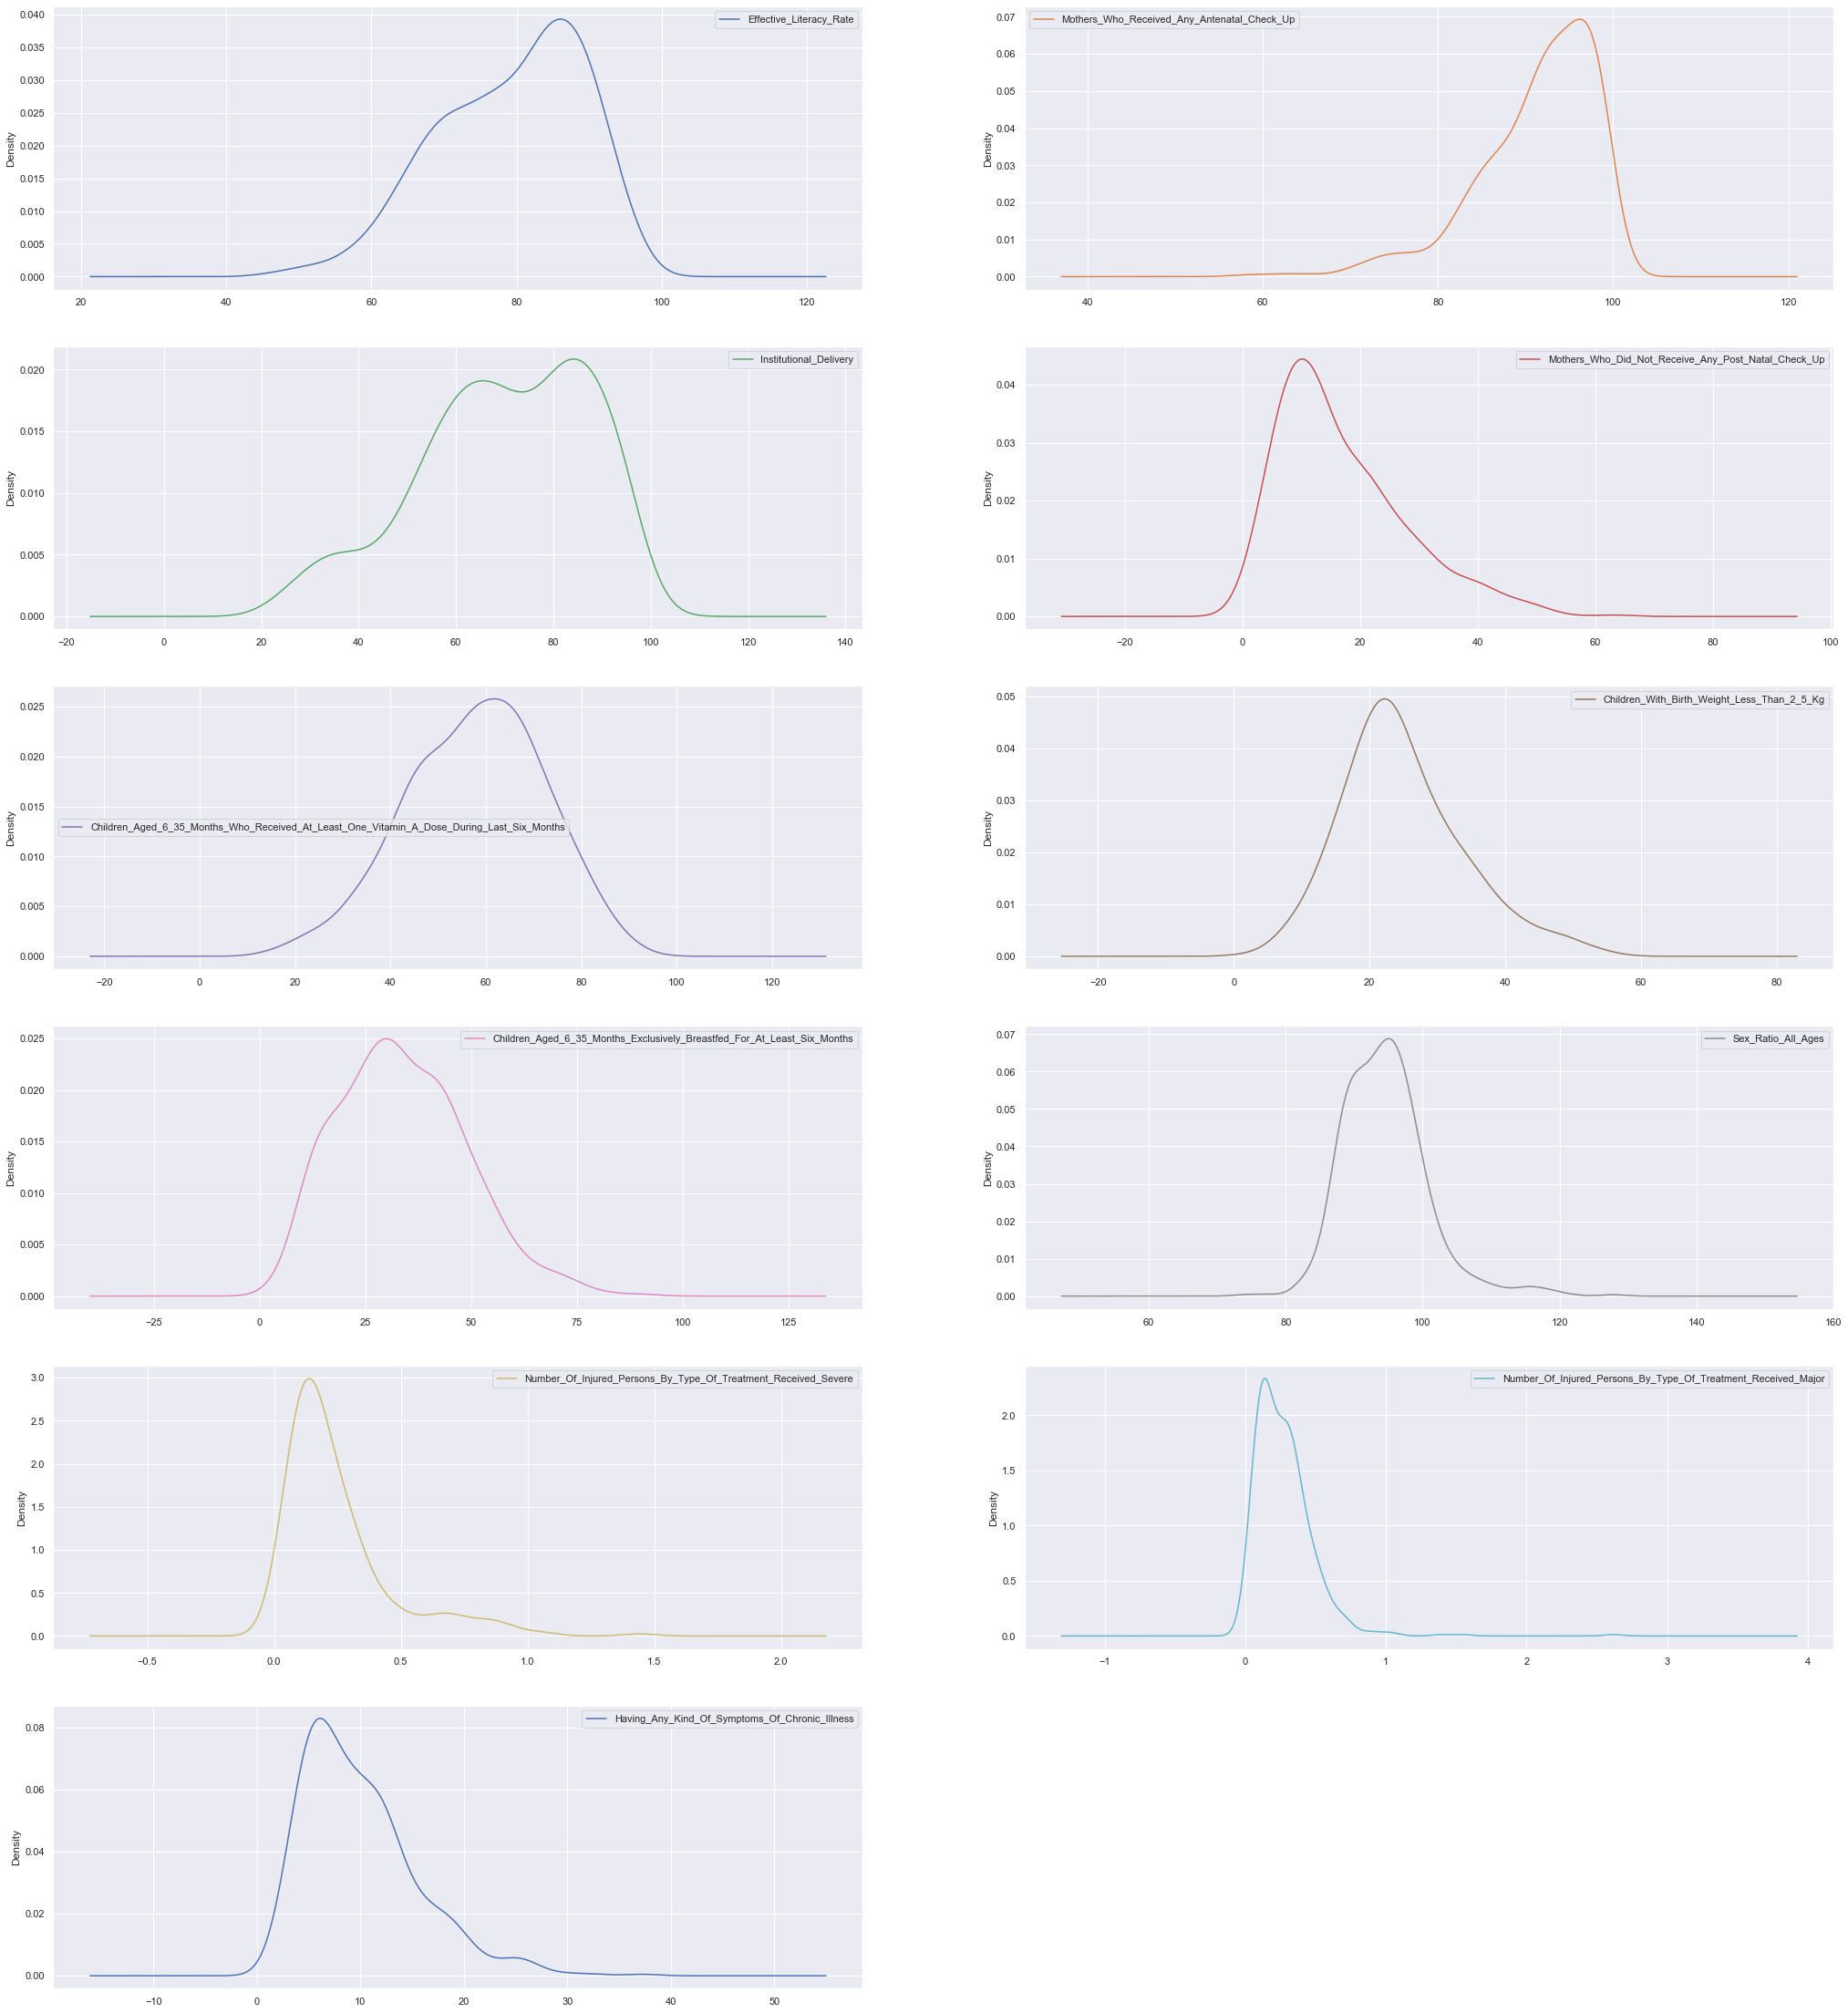

In [9]:
# Variables Distributions:

df.plot(kind='density',subplots=True, layout=(6,2), figsize=(35,40), **{'sharex':False,'sharey':False})

plt.show()

### Size of data

In [7]:
size = df.shape[0]

### Deal with Categorical Features

In [8]:
df

,State_Name,Effective_Literacy_Rate,Mothers_Who_Received_Any_Antenatal_Check_Up,Institutional_Delivery,Mothers_Who_Did_Not_Receive_Any_Post_Natal_Check_Up,Children_Aged_6_35_Months_Who_Received_At_Least_One_Vitamin_A_Dose_During_Last_Six_Months,Children_With_Birth_Weight_Less_Than_2_5_Kg,Children_Aged_6_35_Months_Exclusively_Breastfed_For_At_Least_Six_Months,Sex_Ratio_All_Ages,Number_Of_Injured_Persons_By_Type_Of_Treatment_Received_Severe,Number_Of_Injured_Persons_By_Type_Of_Treatment_Received_Major,Having_Any_Kind_Of_Symptoms_Of_Chronic_Illness,Is_Rural
0,Assam,77.00,93.70,49.60,45.60,57.00,22.70,35.90,94.600,0.10500,0.17600,11.19200,True
1,Assam,76.60,92.10,52.00,47.00,54.40,21.60,28.40,95.500,0.05400,0.03400,7.31800,True
2,Assam,83.40,95.20,61.50,29.30,46.40,27.80,31.80,99.900,1.43000,0.18500,22.59600,True
3,Assam,72.90,90.90,62.40,33.80,44.80,26.20,31.50,95.500,0.08800,0.18300,10.15800,True
4,Assam,80.80,95.00,71.60,28.60,58.00,14.30,43.00,95.500,0.13200,0.24500,7.46000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Uttarakhand,95.53,98.86,89.54,6.86,54.12,27.13,45.28,100.611,0.20652,0.13954,10.27573,False
280,Uttarakhand,94.00,NaN,NaN,NaN,NaN,NaN,NaN,74.083,NaN,NaN,NaN,False
281,Uttarakhand,90.73,94.19,82.69,12.54,70.42,20.05,34.78,93.805,0.10932,0.54658,12.30937,False
282,Uttarakhand,85.74,94.77,71.01,15.61,43.92,21.99,26.37,89.134,0.21664,0.25465,6.60560,False


In [9]:
dummy_df = pd.get_dummies(df)

### Mean Imputation

In [10]:
df = dummy_df.apply(lambda x: x.fillna(x.mean()),axis=0)

### Assigning Treatment, Outcome and Features

In [13]:

T = df['Children_Aged_6_35_Months_Exclusively_Breastfed_For_At_Least_Six_Months'].apply(
      lambda x: 0 if x <= 20 else (1 if x > 20 and x <= 40 else 2)).values
Y = df['Having_Any_Kind_Of_Symptoms_Of_Chronic_Illness'].values
X = df[list(set(df.columns)
            - {'Children_Aged_6_35_Months_Exclusively_Breastfed_For_At_Least_Six_Months',
               'Having_Any_Kind_Of_Symptoms_Of_Chronic_Illness'})].values

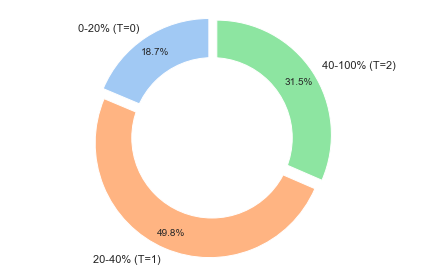

In [14]:
# Pie chart
labels = ['0-20% (T=0)', '20-40% (T=1)', '40-100% (T=2)']
sizes = [(T == 0).sum(), (T == 1).sum(), (T == 2).sum()]
#colors
colors = sns.color_palette('pastel').as_hex()[:3]
#explsion
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

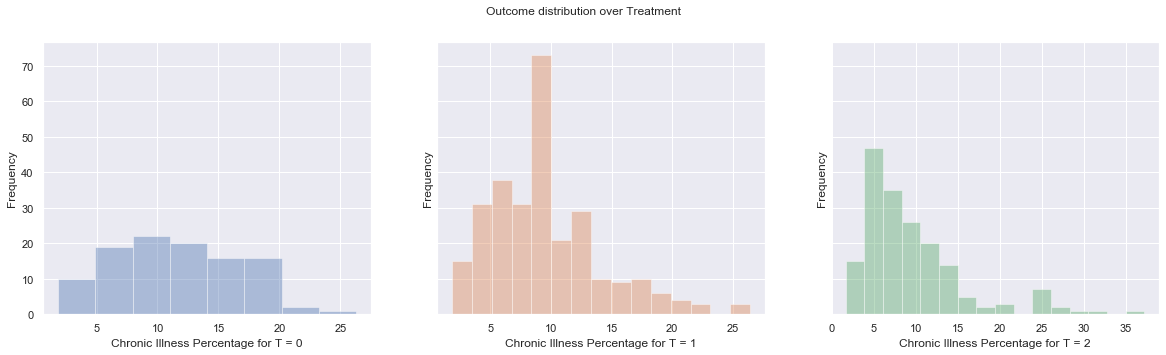

In [15]:
fig, ax =plt.subplots(1,3, figsize=(20,5), sharey=True)

fig.suptitle("Outcome distribution over Treatment")

for t in np.unique(T):
    mask = T == t
    sns.distplot(Y[mask], norm_hist=False, kde=False, ax=ax[t], color=sns.color_palette()[t])
    ax[t].set(
        xlabel=f"Chronic Illness Percentage for T = {t}",
        ylabel='Frequency'
        )


## Methods

### IPW

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
PARAMS = {'n_estimators': 20, 'max_leaf_nodes': 6, 'max_depth': None, 'random_state': 2, 'min_samples_split': 5}
model = GradientBoostingClassifier(**PARAMS).fit(X, T)
# model = LogisticRegression().fit(X, T)
propensity_score = model.predict_proba(X)

In [18]:
# Model Acc:
pred = model.predict(X)
(pred == T).mean()

0.75

In [19]:
# check overlap assumption (PS > 0):
np.all(propensity_score > 0)

True

In [20]:
ps_t0, ps_t1, ps_t2 = propensity_score[:,0], propensity_score[:,1], propensity_score[:,2]

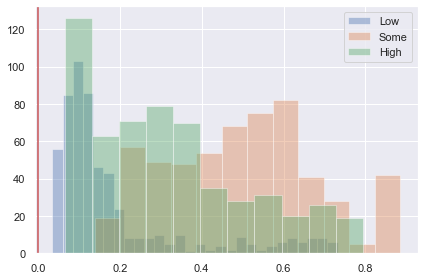

In [21]:
sns.distplot(ps_t0, label="Low", norm_hist=False, kde=False)
sns.distplot(ps_t1, label="Some", norm_hist=False, kde=False)
sns.distplot(ps_t2, label="High", norm_hist=False, kde=False)
plt.axvline(x=0, c='r')
plt.legend()
plt.tight_layout()

plt.show()

In [22]:
from itertools import combinations

for t1,t2 in combinations(np.unique(T),2):
    ipw_ate = ((((T == t1) * Y) / propensity_score[:,t1]).sum() * ((T == t1) / propensity_score[:,t1]).sum()**(-1)) -\
                ((((T == t2) * Y) / propensity_score[:,t2]).sum() * ((T == t2) / propensity_score[:,t2]).sum()**(-1))
    print(f"IPW ATE for ({t1},{t2}): {ipw_ate}")

IPW ATE for (0,1): 1.411566103771964
IPW ATE for (0,2): 1.3990342535334221
IPW ATE for (1,2): -0.012531850238541864


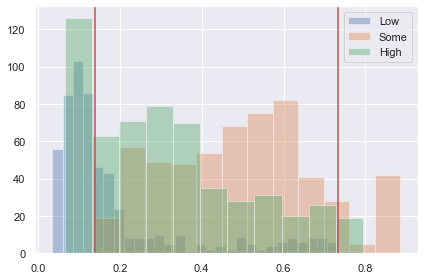

In [23]:
# Common Support:
left_cs = max(ps_t0.min(), ps_t1.min(), ps_t2.min())
right_cs = min(ps_t0.max(), ps_t1.max(), ps_t2.max())
sns.distplot(ps_t0, label="Low", norm_hist=False, kde=False)
sns.distplot(ps_t1, label="Some", norm_hist=False, kde=False)
sns.distplot(ps_t2, label="High", norm_hist=False, kde=False)
plt.legend()
plt.tight_layout()

plt.axvline(x=left_cs, c='r')
plt.axvline(x=right_cs, c='r')
plt.show()

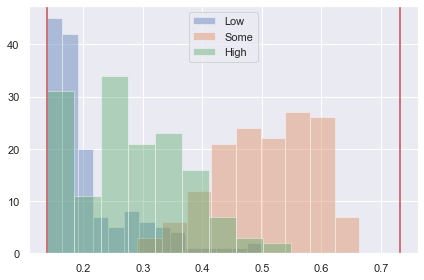

In [24]:
common_support = ( propensity_score >= left_cs ) & ( propensity_score <= right_cs )
cs_records = np.all(common_support, axis=1)

cs_ps_t0, cs_ps_t1, cs_ps_t2 = ps_t0[cs_records], ps_t1[cs_records], ps_t2[cs_records]
sns.distplot(cs_ps_t0, label="Low", norm_hist=False, kde=False)
sns.distplot(cs_ps_t1, label="Some", norm_hist=False, kde=False)
sns.distplot(cs_ps_t2, label="High", norm_hist=False, kde=False)
plt.legend()
plt.tight_layout()

plt.axvline(x=left_cs, c='r')
plt.axvline(x=right_cs, c='r')
plt.show()

In [26]:
from itertools import combinations

cs_prop_score = propensity_score[cs_records]
cs_Y = Y[cs_records]
cs_T = T[cs_records]
cs_X = X[cs_records]
cs_size = cs_records.sum()

for t1,t2 in combinations(np.unique(T),2):
    ipw_ate = ((((cs_T == t1) * cs_Y) / cs_prop_score[:,t1]).sum() * ((cs_T == t1) / cs_prop_score[:,t1]).sum()**(-1)) -\
                ((((cs_T == t2) * cs_Y) / cs_prop_score[:,t2]).sum() * ((cs_T == t2) / cs_prop_score[:,t2]).sum()**(-1))
    print(f"CS IPW ATE for ({t1},{t2}): {ipw_ate}")

CS IPW ATE for (0,1): 0.40523327695806444
CS IPW ATE for (0,2): 0.6727590777508432
CS IPW ATE for (1,2): 0.26752580079277877


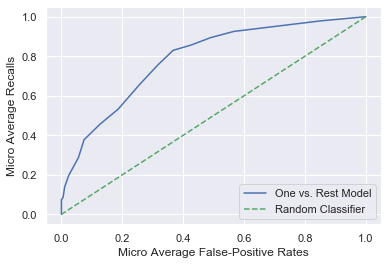

In [105]:
# OVR:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

class_to_val = {'Low' : 0, 
                'Some' : 1, 
                'High' : 2 }


def adjust_labels_to_binary(y_train, target_class_value):
    return np.vectorize(lambda label: 1 if label==class_to_val[target_class_value] else -1)(y_train)

def one_vs_rest(X_train, y_train, target_class_value):
    y_train_binarized = adjust_labels_to_binary(y_train, target_class_value)
    model = GradientBoostingClassifier(**PARAMS)
    # return LogisticRegression(solver='liblinear').fit(X_train, y_train_binarized)
    return model.fit(X_train, y_train_binarized)

def binarized_confusion_matrix(X, y_binarized, one_vs_rest_model, prob_threshold):
    pred_proba = one_vs_rest_model.predict_proba(X)[:,1]
    y_pred = np.where(pred_proba > prob_threshold, 1, -1)
    TP = np.logical_and(y_pred == 1, y_binarized == 1).sum()
    FP = np.logical_and(y_pred == 1, y_binarized == -1).sum()
    FN = np.logical_and(y_pred == -1, y_binarized == 1).sum()
    TN = np.logical_and(y_pred == -1, y_binarized == -1).sum()

    return np.array([[TP, FP], [FN, TN]])

from sklearn.model_selection import train_test_split

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.33, random_state=42)

all_targeted_class_dict = {outcome : one_vs_rest(X_train, T_train, outcome) 
                                                    for outcome in class_to_val.keys()}


def micro_avg_recall(X, y, all_targeted_class_dict, prob_threshold):
    TP = 0
    FN = 0
    for outcome, ovr_model in all_targeted_class_dict.items():
        y_binarized = adjust_labels_to_binary(y, outcome)
        cf = binarized_confusion_matrix(X, y_binarized, ovr_model, prob_threshold)
        TP += cf[0,0]
        FN += cf[1,0]
    
    return (TP / (TP + FN))

def micro_avg_false_positive_rate(X, y, all_targeted_class_dict, prob_threshold):
    FP = 0
    TN = 0
    for outcome, ovr_model in all_targeted_class_dict.items():
        y_binarized = adjust_labels_to_binary(y, outcome)
        cf = binarized_confusion_matrix(X, y_binarized, ovr_model, prob_threshold)
        FP += cf[0,1]
        TN += cf[1,1]
    
    return (FP / (FP + TN))

micro_avg_recalls = []
micro_avg_fp_rates = []
thresholds = np.arange(0,1,0.05)

for threshold in thresholds:
    micro_avg_recalls.append(
        micro_avg_recall(X_test, T_test, all_targeted_class_dict, threshold))
    micro_avg_fp_rates.append(
        micro_avg_false_positive_rate(X_test, T_test, all_targeted_class_dict, threshold))

plt.plot(micro_avg_fp_rates, micro_avg_recalls, label='One vs. Rest Model')
plt.plot(micro_avg_fp_rates, micro_avg_fp_rates, 'g--', label='Random Classifier')
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.legend()
plt.xlabel('Micro Average False-Positive Rates')
plt.ylabel('Micro Average Recalls')
plt.show()

In [30]:
# AUC:

from sklearn.metrics import auc

print(f"AUC = {auc(micro_avg_fp_rates, micro_avg_recalls)}")

AUC = 0.7861235287460389


### S-Learner

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(**PARAMS).fit(np.c_[X, T], Y)
for t1,t2 in combinations(np.unique(T),2):
    t1_prediction = model.predict(np.c_[X, np.ones(size)*t1])
    t2_prediction = model.predict(np.c_[X, np.ones(size)*t2])
    s_learner_ate = (t1_prediction - t2_prediction).mean()
    print(f"S-Learner ATE for ({t1},{t2}): {s_learner_ate}")

S-Learner ATE for (0,1): 0.22550372289334894
S-Learner ATE for (0,2): 0.22550372289334894
S-Learner ATE for (1,2): 0.0


### T-Learner

In [29]:
from sklearn.ensemble import GradientBoostingRegressor


for t1,t2 in combinations(np.unique(T),2):
    t1_X = X[T == t1]
    t1_Y = Y[T == t1]
    t1_model = GradientBoostingRegressor(**PARAMS).fit(t1_X, t1_Y)

    t2_X = X[T == t2]
    t2_Y = Y[T == t2]
    t2_model = GradientBoostingRegressor(**PARAMS).fit(t2_X, t2_Y)
    t1_prediction = t1_model.predict(X)
    t2_prediction = t2_model.predict(X)
    t_learner_ate = (t1_prediction - t2_prediction).mean()
    print(f"T-Learner ATE for ({t1},{t2}): {t_learner_ate}")

T-Learner ATE for (0,1): 1.7175495577728987
T-Learner ATE for (0,2): 2.182799872531315
T-Learner ATE for (1,2): 0.4652503147584159
